In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

from google.colab import drive

import matplotlib.ticker as ticker
from matplotlib import dates
import datetime as dt

from collections import Counter

In [ ]:
drive.mount('/content/drive') #구글 드라이브 접속하려면 이거 써야함
%cd ./drive/Shareddrives/22_FW_고파스 분류예측 프로젝트/ 
df=pd.read_csv("/content/drive/Shareddrives/22_FW_고파스 분류예측 프로젝트/real_last.csv")
df=df.reset_index(drop=True)

Mounted at /content/drive
/content/drive/Shareddrives/22_FW_고파스 분류예측 프로젝트


In [ ]:
sentiword = pd.read_table('/content/drive/Shareddrives/22_FW_고파스 분류예측 프로젝트/sentiword.txt')

In [ ]:
sentiword

,sent,point
0,(-;,1.0
1,(;_;),-1.0
2,(^^),1.0
3,(^-^),1.0
4,(^^*,1.0
...,...,...
14850,갈등 -1,NaN
14851,의혹,-1.0
14852,내팽개치다,-2.0
14853,횡령,-2.0


In [ ]:
sentiword['point'][100:150]

100   -1.0
101   -1.0
102   -1.0
103   -1.0
104   -1.0
105   -1.0
106   -1.0
107   -1.0
108   -1.0
109   -1.0
110   -1.0
111   -1.0
112   -1.0
113   -1.0
114   -1.0
115   -1.0
116    1.0
117    1.0
118    0.0
119   -1.0
120    0.0
121   -1.0
122   -1.0
123   -1.0
124   -2.0
125    1.0
126   -1.0
127   -1.0
128   -1.0
129   -1.0
130   -1.0
131   -1.0
132   -1.0
133   -1.0
134    1.0
135   -1.0
136   -1.0
137   -1.0
138   -1.0
139    1.0
140    1.0
141    2.0
142    2.0
143    2.0
144    2.0
145    2.0
146    1.0
147    1.0
148    1.0
149    1.0
Name: point, dtype: float64

In [ ]:
sentiword['sent'][14850] = '갈등'
sentiword['point'][14850] = -1.0

<ipython-input-5-924c93b20692>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sentiword['sent'][14850] = '갈등'
<ipython-input-5-924c93b20692>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sentiword['point'][14850] = -1.0


In [ ]:
sentiword.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14855 entries, 0 to 14854
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sent    14855 non-null  object 
 1   point   14855 non-null  float64
dtypes: float64(1), object(1)
memory usage: 232.2+ KB


In [ ]:
df

,title,text,date,see,like,comment
0,신은 없어도 위대한 자들은 존재합니다,크툴루를 믿으십시오 \n오 아미그달라 아미그달라 출,2022-12-28 00:20:13,248,6,1.0
1,한국교회는 남들에게 민폐를 끼쳐서 조롱 받는 거,진짜 예수님 말씀대로 봉사만 잘 하면 알아서 신자 늘어나는데 온갖 추악한 일은 다 ...,2022-12-28 00:19:01,161,6,4.0
2,솔로지옥2보는 분들 출연자 인기투표 해봐요 (투표수정),"투표지가 너무 헷갈려서 저부터 잘못 투표했더라구요 ㅋㅋ \n남자분들은 위에 12명,...",2022-12-28 00:16:07,586,1,0.0
3,신 말고 그럼 귀신의 존재는 믿으시나요?,귀신이 존재한다고 보시나요? 출,2022-12-28 00:09:08,340,0,9.0
4,저 오늘 생일이에여 ㅎㅎ,근데 다들 사는게 바빠서ㅜ그런지 아무도 축하메세가 어흑 ㅠㅜ....ㅎㅎ 출,2022-12-28 00:08:58,301,8,10.0
...,...,...,...,...,...,...
48091,안암에서 해 볼 수 있는 곳 있을까요?,일출 보고싶어요ㅠ 출,2022-01-01 00:11:17,663,0,9.0
48092,비문학 뇌지컬 기르는 법,리트고 수능비문학이고 \n뇌지컬을 기르는게 방법이라 생각합니다 \n \n뇌지컬을 향...,2022-01-01 00:08:53,625,0,4.0
48093,1월 1일!!!!!!!,닉네임 바꾸러 가야지.... 출,2022-01-01 00:02:59,164,1,1.0
48094,새해 복 많이 받으세요,다들 원하는 일 이루시길 출,2022-01-01 00:00:29,158,6,1.0


In [ ]:
#맨 뒤에 출 계쏙 나오는거 지우는 간단코드
for i in range(len(df)):
  df['text'][i] = df['text'][i][:-1].strip()

<ipython-input-8-3bb0b9ca0360>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'][i] = df['text'][i][:-1].strip()


In [ ]:
df_text = df['text']
df_title = df['title']

In [ ]:
df_text

0                               크툴루를 믿으십시오 \n오 아미그달라 아미그달라
1        진짜 예수님 말씀대로 봉사만 잘 하면 알아서 신자 늘어나는데 온갖 추악한 일은 다 ...
2        투표지가 너무 헷갈려서 저부터 잘못 투표했더라구요 ㅋㅋ \n남자분들은 위에 12명,...
3                                          귀신이 존재한다고 보시나요?
4                  근데 다들 사는게 바빠서ㅜ그런지 아무도 축하메세가 어흑 ㅠㅜ....ㅎㅎ
                               ...                        
48091                                            일출 보고싶어요ㅠ
48092    리트고 수능비문학이고 \n뇌지컬을 기르는게 방법이라 생각합니다 \n \n뇌지컬을 향...
48093                                      닉네임 바꾸러 가야지....
48094                                        다들 원하는 일 이루시길
48095                                          많이 받으세요!!!!
Name: text, Length: 48096, dtype: object

#감성분석

In [ ]:
pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 58.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.6/465.6 KB 42.6 MB/s eta 0:00:00


In [ ]:
from konlpy.tag import Okt

In [ ]:
stopwords_seoyongi=pd.read_csv("/content/drive/Shareddrives/22_FW_고파스 분류예측 프로젝트/stopword.txt",sep=',', header=None)
stopwords_seoyongi.columns=['stopwords']
stopwords = set(stopwords_seoyongi['stopwords'])


In [ ]:
#불용어 제거 함수
def re_bu(df_text):
  okt = Okt()
  result_bul = []
  for i in range(len(df_text)):
    example=df_text[i]

    word_tokens = okt.morphs(example)

    result = [word for word in word_tokens if not word in stopwords]
    result_bul.append(result)
  return result_bul

In [ ]:
#감성점수 매기는 함수
def re_po(result_bul):
  result_point=[]
  for r_b in result_bul:
    s_point = 0
    for j in r_b:
      try:
        a = sentiword[sentiword['sent'] == j]['point'].item()
        s_point += a
      except:
        pass
    result_point.append(s_point)
  return result_point

In [ ]:
#최종 값으로 뽑아주는 함수
def cole(data):
  pos = 0
  neg = 0
  cen = 0
  for i in data:
    if i > 0:
      pos += 1
    elif i == 0:
      cen += 1
    elif i < 0:
      neg += 1
  sum = pos+neg+cen
  print(f'긍정 비율은 {pos/sum*100}% 부정 비율은 {neg/sum*100}% 중성 비율은 {cen/sum*100} 총 데이터 수는 {len(data)} 오류 수는 {len(data) - sum}')
  return pos, neg, cen


In [ ]:
#list 두개 더하는 함수
def listsum(a,b):
  result = list()
  for i in range(len(a)):
    result.append(a[i]+b[i])
  return result

In [ ]:
rebu_text = re_bu(df_text)
rebu_title = re_bu(df_title)
point_text = re_po(rebu_text)
point_title = re_po(rebu_title)
data = listsum(point_text, point_title)
cole(data)

긍정 비율은 28.274700598802394% 부정 비율은 25.03534597471723% 중성 비율은 46.68995342648037 총 데이터 수는 48096 오류 수는 0


(13599, 12041, 22456)

In [ ]:
print(data.index(max(data)), data.index(min(data)))
print(max(data), min(data))

18136 12426
46.0 -50.0


In [ ]:
print(df['title'][18136])
print(df['title'][12426])

재미로 보는 진화심리학, 그리고 남성과 여성  
인간이 타인에 대해 느끼는 슬픔은 심리적 거리에 기반한다고 생각한다.


In [ ]:
#print(df['text'][18136])
print(df['text'][12426])

그래서 사람마다 느끼는 슬픔의 유무나 정도는 다를 수 있다. 그러니 굳이 죄없는 사람의 죽음에 대해 타인과 슬픔의 정도를 비교하며 '나는 슬프지 않아요, 이것보다 어떤 죽음이 더 슬퍼요'라고 외치지는 않으면 좋겠다. 굳이 왜 외치는건지 모르겠다. 
 
자신만의 입장에서는, 
 
본적도 없고 알지도 못하는 가까운 이웃 사람의 죽음보다, 등하교길이나 출퇴근길에 들리던 카페의 사장님이 돌아가셨다는 죽음이 더 슬플 것이다. 개인적으로 알지는 못해도 자신이 속한 학교나 직장에 다니는 사람이 죽었다는 것이 다른 집단에 속한 사람이 죽었다는 것보다 더 슬플 것이다. 자신이 자주가던 장소에서 사고가 나면 다른장소 사고보다 더 슬플 수 있다. 건설현장에서 하루에 1~2명씩 돌아가신다고 하는데, 자신이 그쪽 일을 해본적이 있다면 다른 현장사고보다 더 슬플 수도 있다. 지금 이 글을 쓰고 있는 중에도 아프리카에서 누군가는 굶어죽어가고 있다는 것에 슬퍼하고 있지는 않지만, 아프리카 의료봉사를 다녀온 누군가는 슬퍼할 수도 있다. 자식이 있는 부부는 없는 부부들보다 다른 가정의 아이의 죽음에 더 슬픔을 공감할 수도 있다. 다 다르다. 
 
이렇게 사람은 타인과의 심리적 거리에 따라서 '모두 다르게' 슬픔을 느낀다고 생각한다. 
 
그러므로 나는 슬프지 않거나 주변보다 덜 슬프다고, 슬퍼하는 사람들이 있을 것임을 분명하게 알면서도 '나는 슬프지 않은데요?'라고 굳이 먼저 말하거나 티내는 것은 슬픔을 강요하는 것만큼이나 참 씁쓸한 행태라고 생각된다. 분명 슬퍼하는 사람들이 있을 걸 알면서도 굳이 '제가 슬프지는 않은데 싸이코패스인가요? 쏘시오패스인가요? 어떤 죽음이 더 슬프고 이건 슬프지 않아요'라는 식의 말은 인터넷에서든 현실에서든 하지 않는게 좋겠다. 다 다르다. 이것이 우리가 장례식장에 갔을때, 다른 방에서 당신이 전혀 모르는 사람의 죽음을 슬퍼하는 사람들에게 '저는 슬프지 않은데요' 라고 말하는 것과 무슨 차이가 있는 행태인지 모르겠다. 
 
 
 
'죄없는 죽음'은 참 안타깝다.

In [ ]:
pos, neg, cen = cole(data)

긍정 비율은 28.274700598802394% 부정 비율은 25.03534597471723% 중성 비율은 46.68995342648037 총 데이터 수는 48096 오류 수는 0


In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 21 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 3s (3,280 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletyp

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44557 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51473 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47549 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48512 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44557 missing from current font.
  font.set_

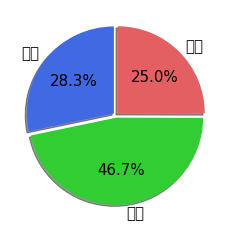

In [ ]:
ratio = [pos, cen, neg]
labels = ['긍정', '중립', '부정']
exp = [0.03, 0.03, 0.03]
colors = ['royalblue', 'limegreen', '#e35f62']
plt.rc('font', family='NanumBarunGothic', size = 15) 
plt.pie(ratio, labels = labels, colors = colors, autopct = '%.1f%%', startangle = 90, explode = exp, shadow = True)
plt.show()

#참고목록

https://bookdown.org/ahn_media/bookdown-demo/anal1freq.html